<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/Practica_S3_Vera_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vanesa Vera

INTELIGENCIA ARTIFICIAL

#Practica S3: Traza de Ejecución de la Clasificación por Arboles de Decisión y de Clustering (Segmentación) por K-means

En esta guia vamos a aprender a trabajar con la tecnica de aprendizaje automático **supervisado** y **no supervisado**. Para esta sección veremos la aplicación de CLASIFICACIÓN del data-set "Iris" por medio de Árboles de Decisión y Clustering  

##1. Árbol de Decisión

###1.1. Maneras de importar el dataset

Para hacer la clasificación por Árbol de decisión, comenzaremos importando el data-set "Iris"
*  En este caso lo imporatremos desde un archivo GitHub [Iris.csv](https://raw.githubusercontent.com/bdm-unlu/2021/master/guias/utiles/iris.csv)

In [ ]:
# !wget toma una dirección URL y descarga
# el archivo asociado directamente al directorio en el que se ejecuta.
!wget https://raw.githubusercontent.com/bdm-unlu/2021/master/guias/utiles/iris.csv


--2025-04-14 18:46:00--  https://raw.githubusercontent.com/bdm-unlu/2021/master/guias/utiles/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4210 (4.1K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   4.11K  --.-KB/s    in 0s      

2025-04-14 18:46:00 (48.2 MB/s) - ‘iris.csv.1’ saved [4210/4210]




*   Tambien podemos importar el dataset desde la propia libreria SKlearn

In [ ]:
from sklearn.datasets import load_iris  # Función para cargar el conjunto de datos 'iris'
iris = load_iris()

Teniendo el archivo importado, lo cargamos en un dataframe con ayuda de la libreria **pandas**

In [ ]:
# Importamos las librerias
import pandas as pd
# Lectura del archivo
df = pd.read_csv('iris.csv.1')
# Vista de las primeras 5 lineas de los datos cargados
df.head()

,#,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Verificaremos el tamaño del dataframe

In [ ]:
df.shape

(150, 6)

Debemos tener en cuenta que al trabajar con SKlearn, trabajaremos con las características(features) y la variable dependiente (target)

In [ ]:
# Separación a mano de las caractericas de la varaible dependiente
# Features
feature_names = ['Sepal.Length', 'Sepal.Width','Petal.Length','Petal.Width']
x = df[feature_names]
# Target
y = df.Species

Teniendo lo anterior claro, procederemos a realizar el programa completo, pero esta vez importaremos el database "Iris" desde la libreria SKlearn

--2025-04-14 19:50:41--  https://raw.githubusercontent.com/bdm-unlu/2021/master/guias/utiles/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4210 (4.1K) [text/plain]
Saving to: ‘iris.csv.2’

iris.csv.2          100%[===================>]   4.11K  --.-KB/s    in 0s      

2025-04-14 19:50:42 (38.6 MB/s) - ‘iris.csv.2’ saved [4210/4210]

Precisión del Árbol de Decisión: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1

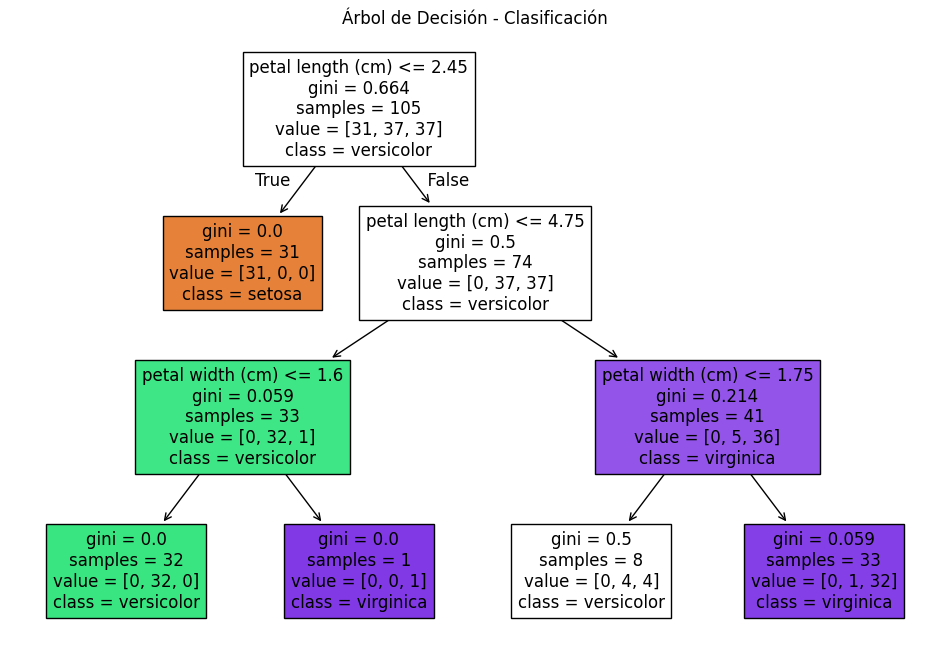

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd  # Para la manipulación de datos tabulares
# Para dividir los datos en conjuntos de entrenamiento/prueba
from sklearn.model_selection import train_test_split
# Para crear y visualizar el modelo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Para evaluar el rendimiento del modelo
from sklearn.metrics import classification_report, accuracy_score
 # Para graficar el árbol de decisión
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris desde sklearn
!wget https://raw.githubusercontent.com/bdm-unlu/2021/master/guias/utiles/iris.csv
# Lectura del archivo
df = pd.read_csv('iris.csv.1')
# Vista de las primeras 5 lineas de los datos cargados
df.head()

# Crear un DataFrame con características y etiquetas
 # Convertimos las características en un DataFrame de pandas-
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Class'] = iris.target  # Agregamos la columna 'Class', que representa las clases de flores

# Separar las características (X) y la variable objetivo (y)
X = df[iris.feature_names]  # Seleccionamos las columnas de características (entradas para el modelo)
y = df['Class']           # Seleccionamos la columna 'Class' como variable objetivo (lo que queremos predecir)

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
# Realizamos la división manteniendo reproducibilidad con random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión
# Creamos un clasificador usando el criterio Gini y limitando la profundidad a 3
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)  # Entrenamos el modelo con los datos de entrenamiento

# Evaluar el modelo con los datos de prueba
# Calculamos la precisión comparando las predicciones con las etiquetas reales
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, clf.predict(X_test)))
# Mostramos métricas como precisión, recall y f1-score
print("\nReporte de Clasificación:\n", classification_report(y_test, clf.predict(X_test)))

# Visualizar el Árbol de Decisión
plt.figure(figsize=(12, 8))  # Configuramos el tamaño del gráfico
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)  # Dibujamos el árbol con nombres y colores
plt.title("Árbol de Decisión - Clasificación")  # Agregamos un título al gráfico
plt.show()  # Mostramos el gráfico en pantalla


Estos resultados muestran que el programa tuvo una precisión del 100%, es decir que clasificó todos los datos correctamente.

El árbol presenta la siguiente clasificación de decisiones:

1. Si el ancho del pétalo (petal width) <= 0.6:
   Clase: Iris-setosa

2. Si el ancho del pétalo (petal width) > 0.6:
   2.1. Si el ancho del pétalo (petal width) <= 1.7:
        - Si la longitud del pétalo (petal length) <= 4.9:
          Clase: Iris-versicolor
        - Si la longitud del pétalo (petal length) > 4.9:
            - Si el ancho del pétalo (petal width) <= 1.5:
              Clase: Iris-virginica
            - Si el ancho del pétalo (petal width) > 1.5:
              Clase: Iris-versicolor

   2.2. Si el ancho del pétalo (petal width) > 1.7:
        Clase: Iris-virginica



#2. Aplicación por Clustering

Para realizar la clusterización, primero importamos el data-set iris y lo transformamos en un DataFrame utilizando la librería pandas, lo que nos permite
manejar los datos de forma tabular y facilitar su análisis. Posteriormente, implementamos el modelo K-means para agrupar los datos en 3 clusters basándonos en las similitudes entre las características de las flores, como la longitud y el ancho de los sépalos y pétalos. El modelo ajusta iterativamente los centros de los clusters mediante la minimización de las distancias entre los datos y los centros asignados. Finalmente, los resultados de la clusterización se visualizan en un gráfico de dispersión generado con seaborn, donde los puntos se colorean según el cluster al que pertenecen, permitiendo identificar patrones claros en los datos


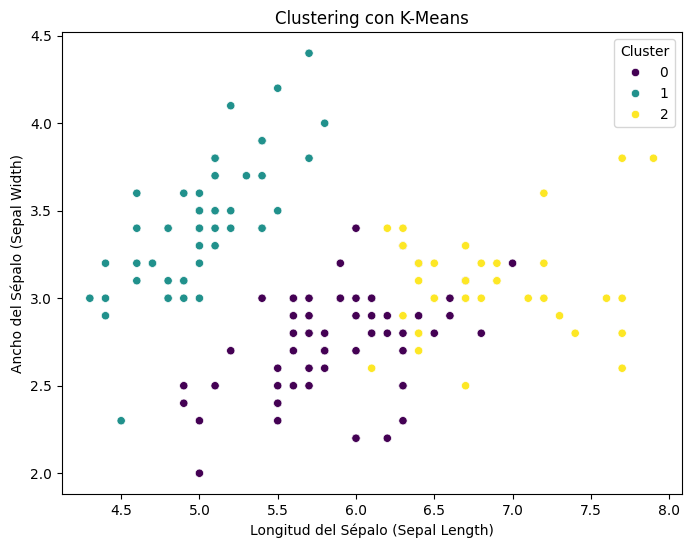

In [ ]:
# Importar bibliotecas necesarias
# Para la manipulación de datos tabulares
import pandas as pd
# Para implementar el algoritmo de clustering K-Means
from sklearn.cluster import KMeans
# Para generar gráficos de dispersión
import matplotlib.pyplot as plt
# Para visualizaciones estilizadas
import seaborn as sns

# Cargar el conjunto de datos Iris desde sklearn
# Función para cargar el conjunto de datos 'iris'
from sklearn.datasets import load_iris
# Cargamos las características y etiquetas de flores en un formato manejable
iris = load_iris()

# Convertimos las características en un DataFrame de pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Crear el modelo de K-Means para clustering
# Definimos que queremos dividir los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=50)
# Entrenamos el modelo K-Means con las características de las flores
kmeans.fit(df)

# Asignar los clusters generados al DataFrame
 # Agregamos una columna llamada 'Cluster' con las etiquetas asignadas por el modelo
df['Cluster'] = kmeans.labels_

# Visualizar los clusters (utilizando solo las primeras dos características para simplicidad)
# Configuramos el tamaño del gráfico
plt.figure(figsize=(8, 6))
# Generamos un gráfico de dispersión con colores según el cluster
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette="viridis", legend="full")
# Etiqueta del eje X
plt.xlabel("Longitud del Sépalo (Sepal Length)")
# Etiqueta del eje Y
plt.ylabel("Ancho del Sépalo (Sepal Width)")
# Agregamos un título al gráfico
plt.title("Clustering con K-Means")
plt.show()  # Mostramos el gráfico en pantalla


El gráfico muestra que las flores dentro de cada cluster tienen valores similares para estas características, y los grupos están claramente separados en el espacio del gráfico